# <center>Evalution</center>
---
---

NAB (Numenta Anomaly Benchmark):
- developed to detect anomalies in streaming data. It's benefits include detected potential failures and unusual patterns.

The are datasets with and without the anomaly, consisting of timestamps of five minute gaps from the first of April 2014 until 23:55pm on the 14th April 2014, creating 4032 values recorded at each of these intervals:

In [1]:
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# With anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [2]:
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [3]:
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [4]:
import pandas as pd
import numpy as np

---

In [5]:
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")
df_small_noise

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


In [6]:
df_small_noise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [7]:
df_small_noise.iloc[0]['value']

18.324918539200002

In [18]:
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [6]:
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")
df_daily_jumpsup

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739
...,...
2014-04-14 23:35:00,18.074649
2014-04-14 23:40:00,21.002014
2014-04-14 23:45:00,20.566713


In [7]:
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


---

Normalizing or scaling the data:

In [8]:
train_mean = df_small_noise.mean()
train_mean

value    42.438353
dtype: float64

In [9]:
train_std = df_small_noise.std()
train_std

value    28.077122
dtype: float64

In [10]:
df_train_vals = (df_small_noise - train_mean) / train_std

In [11]:
df_train_vals.head(20)

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173
2014-04-01 00:25:00,-0.757310
2014-04-01 00:30:00,-0.776456
2014-04-01 00:35:00,-0.788084
2014-04-01 00:40:00,-0.747012


In [12]:
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [13]:
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


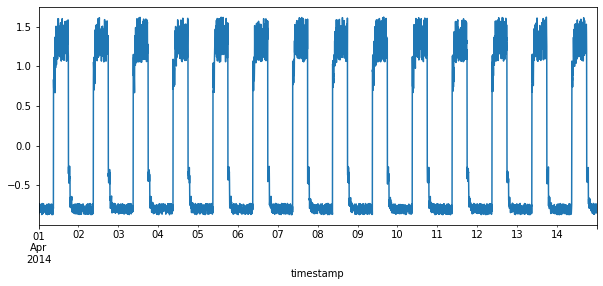

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
df_train_vals.plot(legend=False, ax=ax);

In [18]:
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [27]:
df_train_vals.count()

value    4032
dtype: int64

In [15]:
window_size = 288

In [ ]:
A window size is like a section of a dataset.

In [16]:
def windows(vals, N=window_size):
  L = []
  for i in range(len(vals) - N + 1):
    L.append(vals[i:i+N])
  return np.stack(L)

In [17]:
x_train = windows(df_train_vals)

In [18]:
x_train

array([[[-0.85882857],
        [-0.72899302],
        [-0.84814772],
        ...,
        [-0.86453747],
        [-0.81250829],
        [-0.79671155]],

       [[-0.72899302],
        [-0.84814772],
        [-0.72958579],
        ...,
        [-0.81250829],
        [-0.79671155],
        [-0.78767946]],

       [[-0.84814772],
        [-0.72958579],
        [-0.731173  ],
        ...,
        [-0.79671155],
        [-0.78767946],
        [-0.73706287]],

       ...,

       [[-0.8226548 ],
        [-0.86660975],
        [-0.82181363],
        ...,
        [-0.79164661],
        [-0.78025492],
        [-0.83364049]],

       [[-0.86660975],
        [-0.82181363],
        [-0.75595835],
        ...,
        [-0.78025492],
        [-0.83364049],
        [-0.73510213]],

       [[-0.82181363],
        [-0.75595835],
        [-0.74256753],
        ...,
        [-0.83364049],
        [-0.73510213],
        [-0.8460886 ]]])

In [26]:
# The first value of the first array, and the last value of the last array:
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [27]:
x_train[0]

array([[-0.85882857],
       [-0.72899302],
       [-0.84814772],
       [-0.72958579],
       [-0.731173  ],
       [-0.75730984],
       [-0.77645641],
       [-0.7880838 ],
       [-0.747012  ],
       [-0.829166  ],
       [-0.80377285],
       [-0.7821597 ],
       [-0.81182078],
       [-0.80949918],
       [-0.82334701],
       [-0.79001779],
       [-0.74922405],
       [-0.84169024],
       [-0.73727717],
       [-0.77223023],
       [-0.75311352],
       [-0.79116337],
       [-0.75934728],
       [-0.86809294],
       [-0.75381057],
       [-0.86468256],
       [-0.74361965],
       [-0.72908121],
       [-0.82850668],
       [-0.84043795],
       [-0.76136364],
       [-0.8343536 ],
       [-0.74708881],
       [-0.85574949],
       [-0.85245676],
       [-0.73090636],
       [-0.77440264],
       [-0.74974936],
       [-0.82419543],
       [-0.77402585],
       [-0.78574242],
       [-0.7844733 ],
       [-0.77316412],
       [-0.78843253],
       [-0.80927467],
       [-0

In [29]:
# Pythons flatten() method collapses an array into one dimension:
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

In [26]:
df_train_vals.count()

value    4032
dtype: int64

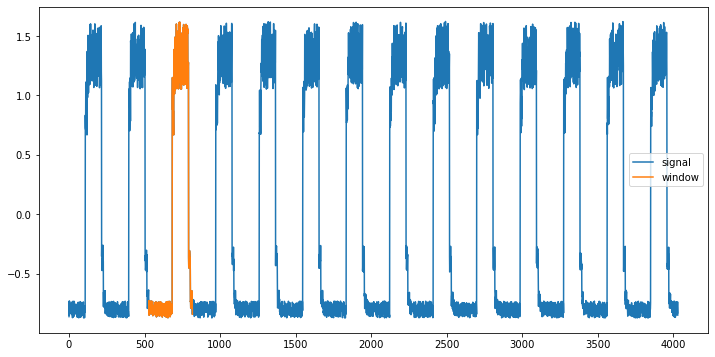

In [20]:
# Selecting where to start the window:
window_no = 530
fig, ax = plt.subplots(figsize=(12, 6))
y = df_train_vals['value'].values

ax.plot(np.arange(y.shape[0]), y, label='signal')

# The plot window is superimposed over the original plot: 
w = x_train[window_no].flatten()

ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

In [36]:
w.shape

(288,)

In [37]:
x_train.shape

(3745, 288, 1)

In [29]:
y.shape[0]

4032

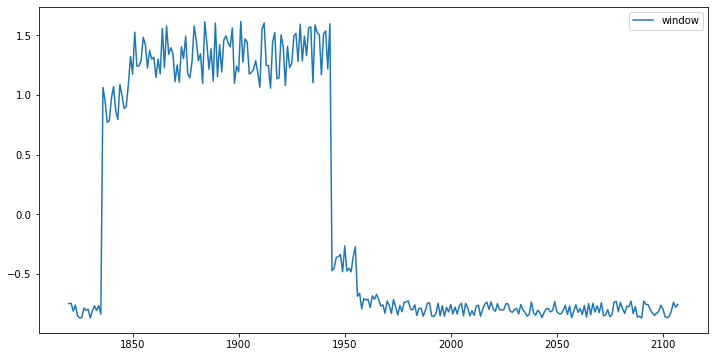

In [35]:
# A window allows you to 'zoom in' on a section of the data and gives a clearer idea of what is going on in that area:
# Starting the window at 1820:
window_no = 1820
fig, ax = plt.subplots(figsize=(12, 6))
w = x_train[window_no].flatten()
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')
ax.legend();